In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt, colors, lines

## Generate plots for Adaptive *k*-NN on Random Subspaces and Tiny ImageNet

This code expects the output from the `Adaptive k-NN Subspaces Tiny ImageNet` notebook, so be sure to run that first.

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [3.25, 2.5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']
color_cycle = ['#003366', '#800000']

res_npz = np.load(os.path.join('results', 'tiny_imagenet_subspaces.npz'))
res_tiny_imagenet_np=res_npz['res_tiny_imagenet_np']
res_subspace_np=res_npz['res_subspace_np']
n=res_npz['n']
m=res_npz['m']
ps=res_npz['ps']
k=res_npz['k']
h=res_npz['h']
delta=res_npz['delta']
n_trials=res_npz['n_trials']
which_alpha=res_npz['which_alpha']
alpha_cs=res_npz['alpha_cs']
alpha_cs_ti=res_npz['alpha_cs_ti']

In [3]:
def plot_twin_ax_with_quartiles(ax, title, recovered_frac, n_iter_frac, alpha_cs, legend=True, left=True, bottom=True, right=True):
    
    y_recover = np.median(recovered_frac, axis=0)
    y_recover_1q = np.percentile(recovered_frac, 25, axis=0)
    y_recover_3q = np.percentile(recovered_frac, 75, axis=0)
    
    y_n_iter = np.median(n_iter_frac, axis=0)
    y_n_iter_1q = np.percentile(n_iter_frac, 25, axis=0)
    y_n_iter_3q = np.percentile(n_iter_frac, 75, axis=0)
    
    ax_r = ax.twinx()
    
    ax.fill_between(alpha_cs, y_recover_1q, y_recover_3q, facecolor=color_cycle[0], alpha=0.3)
    ax.semilogx(alpha_cs, y_recover, c=color_cycle[0], label='top $k$ fraction')
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks(np.linspace(0, 1, 6))
    #ax.set_ylabel('Fraction of top $k$ found')
    #ax.set_xlabel(r'$C_\alpha$')
    if legend:
        solid_legend = ax.legend(loc='upper left')
    ax.set_title(title)
    ax.grid(axis='x')
    ax.grid(which='minor', axis='x', alpha=0.2)
    ax.set_zorder(ax_r.get_zorder() + 1)
    ax.patch.set_visible(False)
    ax.tick_params(axis='both', which='both', left=left, labelleft=left, bottom=bottom, labelbottom=bottom)

    ax_r.fill_between(alpha_cs, y_n_iter_1q, y_n_iter_3q, facecolor=color_cycle[1], alpha=0.3)
    ax_r.loglog(alpha_cs, y_n_iter, '--', c=color_cycle[1])
    ax_r.set_yscale('log')
    ax_r.set_ylim(1e-4 * 10**(1/3), 10**(1/3))
    #ax_r.set_ylabel('\#iters / mn')
    if legend:
        dashed_plt, = ax.plot([], [], '--', c=color_cycle[1])
        ax.legend((dashed_plt,), ('\#iters / mn',), loc='lower right')
        ax.add_artist(solid_legend)
    ax_r.grid(True)
    ax_r.grid(which='minor', alpha=0.2)
    ax_r.tick_params(axis='both', which='both', right=right, labelright=right)

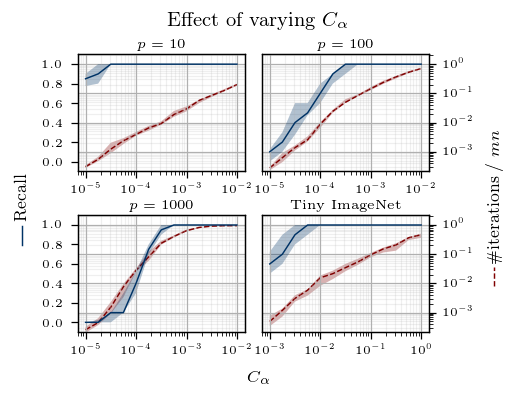

In [4]:
fig, axes = plt.subplots(2, 2)

for i in range(3):
    plot_twin_ax_with_quartiles(axes.ravel()[i], '$p = %g$' % ps[i],
                                res_subspace_np[:, i, 0, 0, 0, 0, 0, :, 0] / k,
                                res_subspace_np[:, i, 0, 0, 0, 0, 0, :, 1] / n / m,
                                alpha_cs, legend=False, left=i % 2 == 0, bottom=True, right=i % 2 == 1)
plot_twin_ax_with_quartiles(axes[1, 1], 'Tiny ImageNet',
                            res_tiny_imagenet_np[:, 0, 0, 0, 0, 0, :, 0] / k,
                            res_tiny_imagenet_np[:, 0, 0, 0, 0, 0, :, 1] / n / m,
                            alpha_cs_ti, legend=False, left=False)

plt.tight_layout(pad=1.7, h_pad=0.2, w_pad=0.2)

# add legend to axis labels
left_solid_line = lines.Line2D([0.017]*2, [0.375, 0.425], color=color_cycle[0], transform=fig.transFigure, figure=fig)
right_dashed_line = lines.Line2D([0.985]*2, [0.265, 0.315], linestyle='--', color=color_cycle[1], transform=fig.transFigure, figure=fig)
fig.lines.extend([left_solid_line, right_dashed_line])
fig.canvas.draw()

fig.text(0.5, 0.965, r'Effect of varying $C_\alpha$', ha='center', va='center', size='large')
fig.text(0.017, 0.5, 'Recall', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.015, r'$C_\alpha$', ha='center', va='center')
fig.text(0.985, 0.5, r'\#iterations / $mn$', ha='center', va='center', rotation='vertical')

plt.savefig(os.path.join('results', 'tiny_imagenet_subspaces.pdf'))
plt.show()